In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fuerte olimpo
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | srednekolymsk
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | guayaramerin
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | havre-saint-pierre
Processing Record 14 of Set 1 | souillac
Processing Record 15 of Set 1 | asau
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | tateyama
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | rock sound
Processing Record 20 of Set 1 | elk city
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | rawson
Processing Record 23 of 

Processing Record 40 of Set 4 | vao
Processing Record 41 of Set 4 | jaisalmer
Processing Record 42 of Set 4 | wanxian
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | coquimbo
Processing Record 45 of Set 4 | burgeo
Processing Record 46 of Set 4 | labutta
City not found. Skipping...
Processing Record 47 of Set 4 | batemans bay
Processing Record 48 of Set 4 | buhl
Processing Record 49 of Set 4 | victoria
Processing Record 50 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | viedma
Processing Record 2 of Set 5 | arys
Processing Record 3 of Set 5 | xining
Processing Record 4 of Set 5 | cotonou
Processing Record 5 of Set 5 | lephepe
City not found. Skipping...
Processing Record 6 of Set 5 | minab
Processing Record 7 of Set 5 | pestovo
Processing Record 8 of Set 5 | zakamensk
Processing Record 9 of Set 5 | half moon bay
Processing Record 10 of Set 5 | xuanhua
Processing Record 11 of Set 5 | barcelona
Processing Record 12 of Set 5 | maniitsoq
Processing Reco

Processing Record 31 of Set 8 | narsaq
Processing Record 32 of Set 8 | itaituba
Processing Record 33 of Set 8 | aksarayskiy
Processing Record 34 of Set 8 | vuktyl
Processing Record 35 of Set 8 | hervey bay
Processing Record 36 of Set 8 | saint-augustin
Processing Record 37 of Set 8 | kayerkan
Processing Record 38 of Set 8 | otane
Processing Record 39 of Set 8 | norfolk
Processing Record 40 of Set 8 | vardo
Processing Record 41 of Set 8 | palmer
Processing Record 42 of Set 8 | kruisfontein
Processing Record 43 of Set 8 | katsuura
Processing Record 44 of Set 8 | omboue
Processing Record 45 of Set 8 | sayat
Processing Record 46 of Set 8 | faya
Processing Record 47 of Set 8 | ostrovnoy
Processing Record 48 of Set 8 | lasa
Processing Record 49 of Set 8 | mrirt
City not found. Skipping...
Processing Record 50 of Set 8 | urulga
City not found. Skipping...
Processing Record 1 of Set 9 | sao paulo de olivenca
Processing Record 2 of Set 9 | bokajan
Processing Record 3 of Set 9 | riachao
Processi

Processing Record 18 of Set 12 | caravelas
Processing Record 19 of Set 12 | lindas
Processing Record 20 of Set 12 | bani
Processing Record 21 of Set 12 | samusu
City not found. Skipping...
Processing Record 22 of Set 12 | syracuse
Processing Record 23 of Set 12 | yumbing
Processing Record 24 of Set 12 | gobabis
Processing Record 25 of Set 12 | kahului
Processing Record 26 of Set 12 | santa rosa
Processing Record 27 of Set 12 | ternat
Processing Record 28 of Set 12 | sanghar
Processing Record 29 of Set 12 | campana
Processing Record 30 of Set 12 | mnogovershinnyy
Processing Record 31 of Set 12 | djambala
Processing Record 32 of Set 12 | ulfborg
Processing Record 33 of Set 12 | xadani
City not found. Skipping...
Processing Record 34 of Set 12 | san cristobal
Processing Record 35 of Set 12 | ji-parana
City not found. Skipping...
Processing Record 36 of Set 12 | majene
Processing Record 37 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 38 of Set 12 | kalianget
Proce

In [8]:
  # Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fuerte Olimpo,-21.0415,-57.8738,75.97,41,0,5.32,PY,2021-04-22 01:24:26
1,Bambous Virieux,-20.3428,57.7575,77.00,94,40,4.61,MU,2021-04-22 01:24:27
2,Srednekolymsk,67.4500,153.6833,32.49,98,52,12.35,RU,2021-04-22 01:24:27
3,Pevek,69.7008,170.3133,30.07,70,10,16.22,RU,2021-04-22 01:24:27
4,Albany,42.6001,-73.9662,36.00,58,40,1.01,US,2021-04-22 01:24:28
5,Mataura,-46.1927,168.8643,55.00,84,75,1.01,NZ,2021-04-22 01:24:28
6,Guayaramerin,-10.8368,-65.3614,75.87,84,60,2.71,BO,2021-04-22 01:21:20
7,Bluff,-46.6000,168.3333,55.00,84,100,1.01,NZ,2021-04-22 01:24:28
8,Butaritari,3.0707,172.7902,82.00,78,100,15.05,KI,2021-04-22 01:24:29
9,Rikitea,-23.1203,-134.9692,77.58,74,100,11.99,PF,2021-04-22 01:23:09


In [9]:
# Create the output file (CSV).
output_data_file = "Weather_Data_cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1619054937.881923

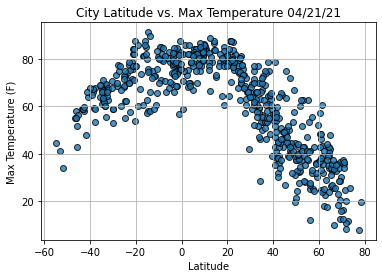

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

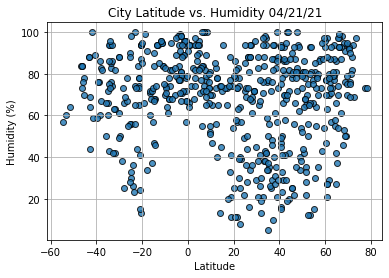

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

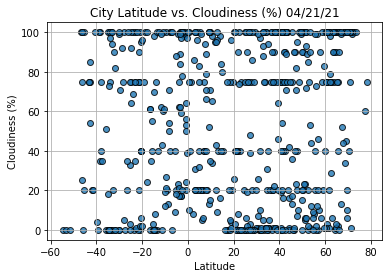

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

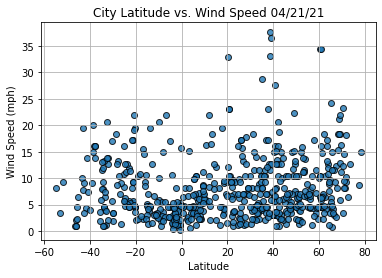

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
#
index13 = city_data_df.loc[13]
index13

City                     Souillac
Lat                      -20.5167
Lng                       57.5167
Max Temp                       77
Humidity                       94
Cloudiness                     40
Wind Speed                   4.61
Country                        MU
Date          2021-04-22 01:24:30
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
568     True
569     True
570    False
571    False
572    False
Name: Lat, Length: 573, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Srednekolymsk,67.4500,153.6833,32.49,98,52,12.35,RU,2021-04-22 01:24:27
3,Pevek,69.7008,170.3133,30.07,70,10,16.22,RU,2021-04-22 01:24:27
4,Albany,42.6001,-73.9662,36.00,58,40,1.01,US,2021-04-22 01:24:28
8,Butaritari,3.0707,172.7902,82.00,78,100,15.05,KI,2021-04-22 01:24:29
10,Georgetown,5.4112,100.3354,84.20,83,20,3.44,MY,2021-04-22 01:22:23


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

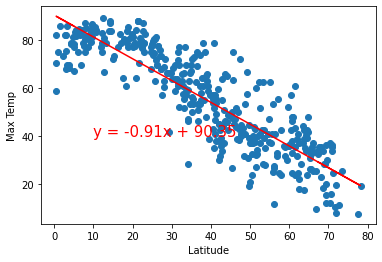

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

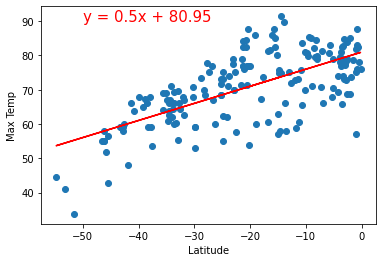

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

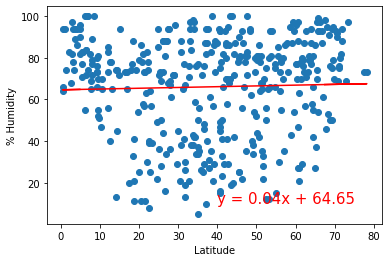

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

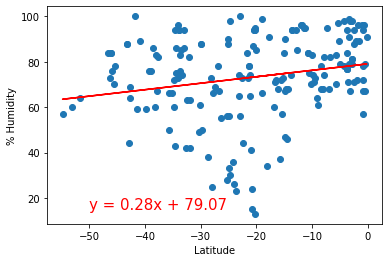

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

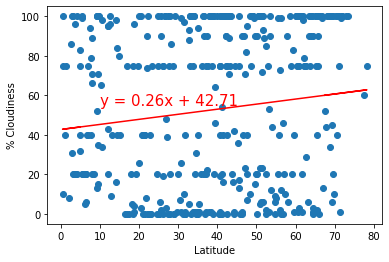

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

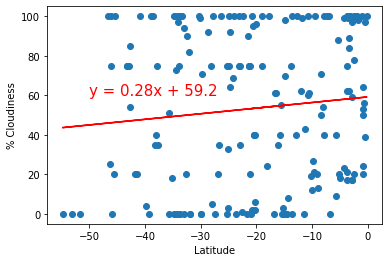

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

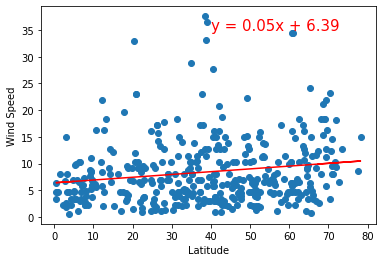

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

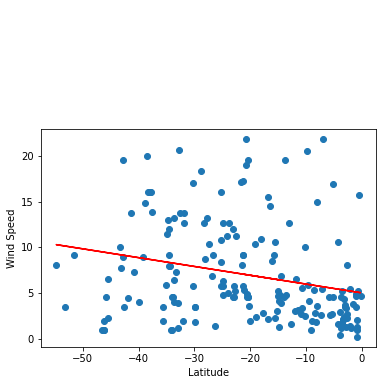

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))